### Libraries necessárias para o estudo

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
%matplotlib inline

In [6]:
selected =  ['ABEV3.SA', 'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA','LREN3.SA',
           'RADL3.SA','RENT3.SA','WEGE3.SA','CIEL3.SA','MDIA3.SA']
table= pd.DataFrame()
for i in selected:
    table[i] = wb.DataReader(i, data_source='yahoo', start='2012-1-1', end='2018-11-19')['Close']

In [8]:
table.head()

,ABEV3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,LREN3.SA,RADL3.SA,RENT3.SA,WEGE3.SA,CIEL3.SA,MDIA3.SA
Date,,,,,,,,,,
2012-01-02,10.8725,2.53669,11.8113,10.660,8.42975,13.20,7.74286,5.52071,9.71539,15.5067
2012-01-03,10.7486,2.47894,12.1781,10.875,8.39669,13.40,7.97610,5.65089,9.75156,15.4167
2012-01-04,10.4987,2.51877,12.2735,10.805,8.30909,13.40,7.67376,5.68047,9.78572,15.7200
2012-01-05,10.2909,2.52872,11.7746,10.750,8.59174,13.30,7.43476,5.71598,9.64506,15.8233
2012-01-06,10.2649,2.53868,11.8333,10.800,8.71074,13.25,7.48659,5.65089,9.58478,15.8000


### Cálculo dos retornos diários e anuais médios das ações

In [9]:
returns_daily = table.pct_change()

returns_annual = returns_daily.mean() * 250

In [10]:
returns_annual

ABEV3.SA    0.085334
EQTL3.SA    0.282809
EZTC3.SA    0.129100
FLRY3.SA    0.138559
LREN3.SA    0.259255
RADL3.SA    0.272715
RENT3.SA    0.238515
WEGE3.SA    0.209990
CIEL3.SA    0.037138
MDIA3.SA    0.192913
dtype: float64

### Retornar retornos diários e covariâncias das ações

In [11]:
cov_daily = returns_daily.cov()

cov_annual = cov_daily * 250

In [12]:
cov_annual

,ABEV3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,LREN3.SA,RADL3.SA,RENT3.SA,WEGE3.SA,CIEL3.SA,MDIA3.SA
ABEV3.SA,0.049452,0.011928,0.020322,0.008398,0.022493,0.016764,0.021877,0.017002,0.018743,0.014701
EQTL3.SA,0.011928,0.061304,0.025425,0.012124,0.025594,0.015011,0.025647,0.012612,0.016820,0.011134
EZTC3.SA,0.020322,0.025425,0.118564,0.018878,0.042025,0.022811,0.045673,0.019832,0.025850,0.026092
FLRY3.SA,0.008398,0.012124,0.018878,0.084533,0.021086,0.011643,0.019514,0.007657,0.010810,0.015767
LREN3.SA,0.022493,0.025594,0.042025,0.021086,0.093631,0.030924,0.047002,0.022760,0.027010,0.023322
RADL3.SA,0.016764,0.015011,0.022811,0.011643,0.030924,0.085676,0.027766,0.018351,0.021555,0.014964
RENT3.SA,0.021877,0.025647,0.045673,0.019514,0.047002,0.027766,0.111341,0.020696,0.026370,0.023942
WEGE3.SA,0.017002,0.012612,0.019832,0.007657,0.022760,0.018351,0.020696,0.070840,0.017713,0.017044
CIEL3.SA,0.018743,0.016820,0.025850,0.010810,0.027010,0.021555,0.026370,0.017713,0.088168,0.020388
MDIA3.SA,0.014701,0.011134,0.026092,0.015767,0.023322,0.014964,0.023942,0.017044,0.020388,0.083271


### Esvaziando as listas para guardar os retornos, volatilidades e pesos dos portfólios imaginários

In [13]:
port_returns = []

port_volatility = []

stock_weights = []

### Configurar número de portfólios simulados

### Portfólios serão encontrados utilizando simulação de Monte-Carlo

In [14]:
num_assets = len(selected)

num_portfolios = 200000

### Vamos preencher cada uma das listas vazias com os retornos, riscos e pesos dos portfólios

In [15]:
for single_portfolio in range(num_portfolios):

    weights = np.random.random(num_assets)

    weights /= np.sum(weights)

    returns = np.dot(weights, returns_annual)

    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))

    port_returns.append(returns)

    port_volatility.append(volatility)

    stock_weights.append(weights)



### Um dicionário para retornos e riscos de cada portfólio

In [16]:
portfolio = {'Retornos': port_returns,

             'Volatilidade': port_volatility}

### Ampliando o dicionário original para conter cada código de ação e peso no portfólio

In [17]:
for counter,symbol in enumerate(selected):

    portfolio[symbol+' peso'] = [weight[counter] for weight in stock_weights]
    
df = pd.DataFrame(portfolio)

### Organizando a tabela para visualização

In [18]:
column_order = ['Retornos', 'Volatilidade'] + [stock+' peso' for stock in selected]

df = df[column_order]

df.head()

,Retornos,Volatilidade,ABEV3.SA peso,EQTL3.SA peso,EZTC3.SA peso,FLRY3.SA peso,LREN3.SA peso,RADL3.SA peso,RENT3.SA peso,WEGE3.SA peso,CIEL3.SA peso,MDIA3.SA peso
0,0.170604,0.167244,0.194162,0.152244,0.160602,0.006224,0.018130,0.107778,0.013012,0.040455,0.100197,0.207196
1,0.178935,0.169879,0.098494,0.047228,0.130213,0.132393,0.153508,0.151426,0.020025,0.056641,0.104449,0.105622
2,0.164860,0.168437,0.194014,0.122510,0.003922,0.146186,0.022820,0.086691,0.196926,0.002459,0.176233,0.048240
3,0.185932,0.174395,0.014742,0.050683,0.148623,0.163918,0.093385,0.224654,0.028003,0.041966,0.113463,0.120563
4,0.213176,0.171577,0.075008,0.128376,0.047232,0.077206,0.059808,0.133974,0.206396,0.182685,0.020471,0.068844


### Ordenando a tabela em ordem decrescente de retorno

In [23]:
retornos = df.sort_values(by=['Volatilidade'], ascending=True)

retornos.head(20)

,Retornos,Volatilidade,ABEV3.SA peso,EQTL3.SA peso,EZTC3.SA peso,FLRY3.SA peso,LREN3.SA peso,RADL3.SA peso,RENT3.SA peso,WEGE3.SA peso,CIEL3.SA peso,MDIA3.SA peso
154402,0.173255,0.150775,0.214621,0.154326,0.009590,0.185506,0.013339,0.058171,0.027580,0.163239,0.059831,0.113798
98450,0.190921,0.151096,0.217629,0.223819,0.002104,0.154265,0.011389,0.135540,0.020068,0.094454,0.027480,0.113251
181814,0.182300,0.151408,0.197481,0.186197,0.016676,0.158183,0.035978,0.105362,0.034497,0.100612,0.067605,0.097410
169304,0.177086,0.151494,0.256175,0.170793,0.042476,0.125142,0.008456,0.091824,0.017081,0.106453,0.029493,0.152106
50456,0.181874,0.151534,0.255686,0.214413,0.038485,0.136722,0.034752,0.065443,0.009503,0.124681,0.019327,0.100988
22106,0.179227,0.151636,0.172241,0.127710,0.010326,0.156872,0.003464,0.121873,0.031750,0.184698,0.077094,0.113973
50177,0.175143,0.151650,0.196005,0.154789,0.011481,0.191777,0.030976,0.055162,0.013959,0.138884,0.057183,0.149784
51612,0.184223,0.151714,0.156473,0.185759,0.002344,0.171797,0.029063,0.070119,0.043592,0.147137,0.071208,0.122508
5949,0.183703,0.151717,0.133861,0.181377,0.015062,0.159773,0.018120,0.078021,0.017293,0.187548,0.082736,0.126208
116419,0.176867,0.151764,0.180317,0.172046,0.044112,0.199294,0.005400,0.097857,0.031133,0.137682,0.066796,0.065362


### Plotando a fronteira eficiente

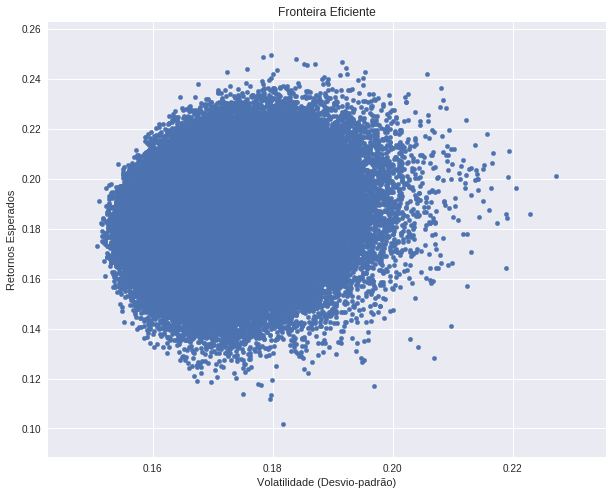

In [20]:
plt.style.use('seaborn')

df.plot.scatter(x='Volatilidade', y='Retornos', figsize=(10, 8), grid=True)

plt.xlabel('Volatilidade (Desvio-padrão)')

plt.ylabel('Retornos Esperados')

plt.title('Fronteira Eficiente')

plt.show()

In [34]:
selected =  ['ABEV3.SA', 'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA','LREN3.SA',
           'RADL3.SA','RENT3.SA','WEGE3.SA','CIEL3.SA','MDIA3.SA']
table2= pd.DataFrame()
for i in selected:
    table2[i] = wb.DataReader(i, data_source='yahoo', start='2018-11-20', end='2019-12-31')['Close']

In [37]:
table2.head()

,ABEV3.SA,EQTL3.SA,EZTC3.SA,FLRY3.SA,LREN3.SA,RADL3.SA,RENT3.SA,WEGE3.SA,CIEL3.SA,MDIA3.SA
Date,,,,,,,,,,
2018-11-21,16.379999,14.302,19.181499,20.280001,35.318199,63.099998,26.895201,17.959999,9.37,42.799999
2018-11-22,16.500000,14.382,19.354700,20.230000,35.272701,63.200001,26.504801,17.620001,9.27,43.000000
2018-11-23,16.200001,14.496,19.148500,19.980000,35.663601,62.709999,26.571400,17.680000,9.25,42.799999
2018-11-26,16.150000,14.440,18.620501,19.959999,34.572701,62.169998,26.276199,17.740000,8.75,42.310001
2018-11-27,16.540001,14.836,18.958700,21.240000,35.900002,62.799999,26.666700,18.049999,8.60,42.189999


In [36]:
teste = table2.iloc[-1] - table2.iloc[0]
teste

ABEV3.SA     2.290001
EQTL3.SA     8.488001
EZTC3.SA    32.718502
FLRY3.SA    10.250000
LREN3.SA    20.871799
RADL3.SA    48.540001
RENT3.SA    20.514799
WEGE3.SA    16.700001
CIEL3.SA    -1.000000
MDIA3.SA    -4.649998
dtype: float64